In [ ]:
#remianing ptoblem : block 3 Z[j][i]not Z[i][j]??? or the same

In [2]:
x_data = [338., 333., 328., 207., 226.,25., 179., 60., 208., 606.]
y_data = [640., 633., 619.,393., 428., 27., 193., 66., 226., 1591.]
# ydata = b + w * xdata

In [3]:
# 指定范围对w,b进行迭代 ？怎么确定初始范围？
import numpy as np
x = np.arange(-200,-100,1) # bias
y = np.arange(-5,5,0.1) # weight
Z = np.zeros((len(x),len(y))) # loss

for i in range(len(x)):
    for j in range(len(y)):
        w = y[j]
        b = x[i]
        Z[i][j] = 0
        for n in range(len(x_data)):
             Z[i][j] = Z[i][j] + (y_data[n] - b - w*x_data[n])**2
        Z[i][j] = Z[i][j]/len(x_data)

### gradient descent
the loss function for the linear regression model $f_j$ is:
$$ L(f) = \sum\limits_i {{{\left({{y_i} - f({x_i})} \right)}^2}}$$
the gradient descent for parameter w and b respectively is :
$$ w_{i+1} = w_i - \eta {\left.{\frac{{\partial L}}{{\partial w}}} \right|_{w = {w_i}}} $$

where $\eta$ is learning rate

<function matplotlib.pyplot.show(*args, **kw)>

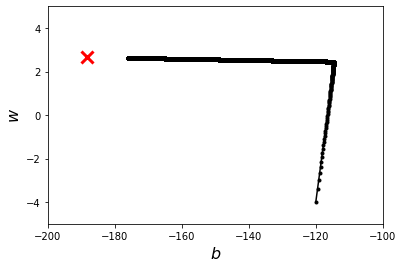

In [4]:
# gradient descent for linear regression
import matplotlib.pyplot as plt

w = -4 # initial weight
b = -120 # initial bias
iteration = 100000
#lr = 0.000001 # learning rate
lr = 1 

# customilized learning rate-> adagrad
lr_b = 0
lr_w = 0

# store initial values for plotting
b_history = [b]
w_history = [w]

for i in range(iteration):
    # initial gradient 
    b_grad = 0.0
    w_grad = 0.0
    
    # 计算当前迭代下的梯度，
    for n in range(len(x_data)):
        # wrong! 仅与最后一组数据有关; 2*你写个锤子
        #b_grad = -2(y_data[n] - b - w*x_data[n])
        #w_grad = -2(w*x_data[n] + b - y_data[n])*x_data[n]
        b_grad = b_grad - 2.0*(y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
        lr_b = lr_b + b_grad ** 2
        lr_w = lr_w + w_grad ** 2
        
    # adagrad; updating the parameters
    w = w - lr/np.sqrt(lr_w) * w_grad
    b = b - lr/np.sqrt(lr_b) * b_grad
    
        
    # store the parameters for plotting
    b_history.append(b)
    w_history.append(w)
    
# plot the figure
#plt.contourf(x,y,Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4],[2.67],'x',ms=12,markeredgewidth=3,color='red')
plt.plot(b_history, w_history, 'o-',ms=3,lw=1.5,color = 'black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show

        

### 对gradient descent 的改进 adagrad
主要思想为将learning rate 改为定制（适应各个参数的变化）
每次更新w/b时采用： $lr/{\sqrt {lr_b}}$， $lr_b$为b的梯度累加和